In [203]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder

In [149]:
# Load data
fp_covid19tracker = '/Users/alexbruefach/Documents/GitHub/DSproject-covid-stress-impact/datasets/united-states.csv'
covid19tracker_df = pd.read_csv(fp_covid19tracker)

/Users/alexbruefach/opt/anaconda3/envs/ds4aw/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4,6,42,81,90,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [266]:
keys_demo = ['state','year-month','endtime','gender','age', 'household_size','household_children',
             'child_age_1', 'child_age_2', 'child_age_3', 'child_age_4','child_age_5', 'child_education_1',
             'child_education_2','child_education_3','child_education_4', 'i10_health', 'i11_health', 'r1_1',
             'WCRV_4'
            ]
keys_stress = ['employment_status','cantril_ladder','PHQ4_1','PHQ4_2','PHQ4_3','PHQ4_4', 'CORE_B2_4',
              'w4_1','w4_2', 'w4_3', 'w4_4', 'w4_5', 'w4_6', 'w4_7', 'w4_8', 'w4_9', 'w4_10', 'w4_11']

In [295]:
df_cleaned = pd.concat(objs = (covid19tracker_df[keys_demo], covid19tracker_df[keys_stress]))
df_cleaned.keys()

Index(['state', 'year-month', 'endtime', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'child_education_1', 'child_education_2',
       'child_education_3', 'child_education_4', 'i10_health', 'i11_health',
       'r1_1', 'WCRV_4', 'employment_status', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'CORE_B2_4', 'w4_1', 'w4_2', 'w4_3',
       'w4_4', 'w4_5', 'w4_6', 'w4_7', 'w4_8', 'w4_9', 'w4_10', 'w4_11'],
      dtype='object')

In [267]:
# cleaned_path = '/Users/alexbruefach/Documents/GitHub/DSproject-covid-stress-impact/datasets/cov19tracker_cleaned.csv'
# df_cleaned.to_csv(cleaned_path)

In [268]:
impact_data_state = {}
impact_data_ym = {}
data_state = data.groupby(['state'], sort = False)
data_ym = data.groupby(['year-month'], sort = False)

for i in range(len(keys_stress)):
    impact_count_state = data_state[keys_stress[i]].value_counts(normalize=True, sort=False)
    impact_data_state[keys_stress[i]] = impact_count_state
    impact_count_ym = data_ym[keys_stress[i]].value_counts(normalize=True, sort=False)
    impact_data_ym[keys_stress[i]] = impact_count_ym

In [ ]:
impact_state.append([{'state':state,'impact': r1_7}
             for (state, r1_7), percentage in dict(impact_count).items()])

In [280]:
state_df = pd.DataFrame(impact_data_state)
ym_df = pd.DataFrame(impact_data_ym)

/Users/alexbruefach/opt/anaconda3/envs/ds4aw/lib/python3.9/site-packages/pandas/core/indexes/multi.py:3554: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result = lib.fast_unique_multiple([self._values, rvals], sort=sort)


In [291]:
ym_df.shape

(26, 18)

In [286]:
#fig, ax = plt.subplots(figsize = (10,10))
sns.catplot(y = 'employment_status', hue = 'state', data = state_df, kind = 'count')
#plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad=0)
plt.show()

ValueError: Could not interpret input 'state'

In [272]:
for i in range(len(keys_stress)):
    sns.catplot(x= 'gender', col = keys_stress[i], col_wrap = 4, hue = 'state', data = ym_df, kind = 'count')
    plt.show()

ValueError: Could not interpret input 'gender'

In [219]:
#cov19track_ohe

In [218]:
# sns.pairplot(covid19tracker_df, hue = 'state', 
#              vars = ['year-month','household_size',
#                      'household_children','employment_status',
#                      'cantril_ladder','PHQ4_1', 'PHQ4_2','PHQ4_3'])

In [151]:
covid19tracker_df['month'] = pd.DatetimeIndex(covid19tracker_df.endtime).month
covid19tracker_df['year'] = pd.DatetimeIndex(covid19tracker_df.endtime).year
covid19tracker_df['year-month'] = pd.to_datetime(covid19tracker_df[['year', 'month']].assign(DAY=1))

In [152]:
covid19tracker_df['year-month'].unique().shape

(24,)

In [154]:
covid19tracker_df['ct5_1'].unique()

array([' ', 'No', 'Yes'], dtype=object)

In [155]:
data = covid19tracker_df[(covid19tracker_df.ct5_1.isin(['No','Yes']))]
# data = data.groupby(['state'], sort = False)
# data_counts = data['w4_2'].value_counts(normalize=True, sort=False)

# data_cleaned = [
#     {'state': state, 'Stress': w4_2, 'percentage': percentage*100} for 
#     (income, occupation), percentage in dict(occupation_counts).items()

In [237]:
#data['state'].value_counts()

In [239]:
data_state = data.groupby(['state'], sort = False)
impact_count = data_state['ct5_1'].value_counts(normalize=True, sort=False)
impact_data =[{'state':state,
               'impact': r1_7,
              'percentage': percentage*100}
             for (state, r1_7), percentage in dict(impact_count).items()]
#print(impact_data)

In [159]:
df_impact = pd.DataFrame(impact_data)

In [160]:
df_impact.head()

,state,impact,percentage
0,Illinois,No,100.0
1,California,No,64.0
2,California,Yes,36.0
3,Missouri,No,62.5
4,Missouri,Yes,37.5


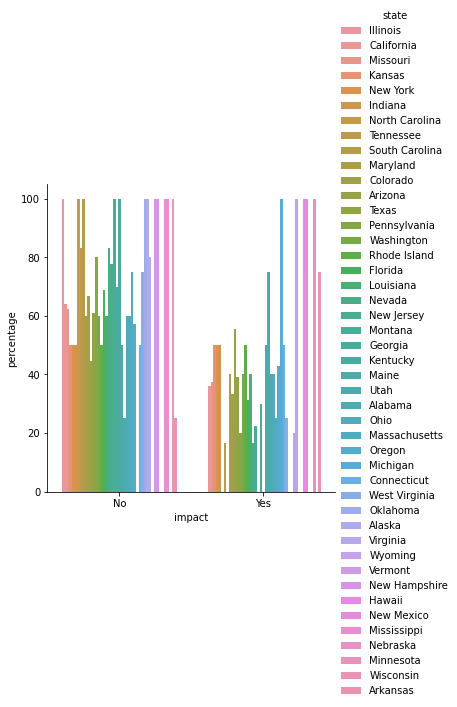

In [169]:
#fig, ax = plt.subplots(figsize = (10,10))
sns.catplot(x = 'impact', y = 'percentage', hue = 'state', data = df_impact, kind = 'bar')
#plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad=0)
plt.show()

In [170]:
covid19tracker_df['w4_1'].unique()

array([' ', 'No', 'Yes'], dtype=object)

In [182]:
covid19tracker_df['year-month'].value_counts()

2021-07-01    3457
2020-04-01    2694
2020-05-01    2365
2020-08-01    2329
2020-09-01    2013
2021-09-01    1952
2021-06-01    1879
2020-07-01    1762
2021-05-01    1756
2020-03-01    1463
2020-06-01    1461
2021-08-01    1439
2021-03-01    1285
2021-02-01    1190
2021-04-01    1139
2020-02-01    1023
2021-11-01     741
2020-10-01     688
2021-12-01     629
2020-11-01     599
2020-01-01     314
2021-10-01     272
2020-12-01     271
2021-01-01     209
Name: year-month, dtype: int64

In [171]:
data = covid19tracker_df[(covid19tracker_df.w4_1.isin(['No','Yes']))]
# data = data.groupby(['state'], sort = False)
# data_counts = data['w4_2'].value_counts(normalize=True, sort=False)

# data_cleaned = [
#     {'state': state, 'Stress': w4_2, 'percentage': percentage*100} for 
#     (income, occupation), percentage in dict(occupation_counts).items()

In [172]:
data['state'].value_counts()

California              91
New York                66
Florida                 62
Texas                   61
Illinois                51
Pennsylvania            41
Georgia                 38
New Jersey              35
Ohio                    31
Virginia                28
Washington              27
Michigan                26
Missouri                21
Minnesota               21
North Carolina          21
Arizona                 21
Tennessee               21
Indiana                 19
Nevada                  18
Massachusetts           18
Wisconsin               16
Alabama                 14
Maryland                12
Colorado                12
Kentucky                12
South Carolina          11
Connecticut             10
Oregon                   9
Utah                     9
Idaho                    8
Alaska                   8
Arkansas                 8
Louisiana                8
Mississippi              7
Hawaii                   7
Kansas                   7
West Virginia            6
N

In [177]:
data_state = data.groupby(['state'], sort = False)
impact_count = data_state['w4_1'].value_counts(normalize=True, sort=False)
impact_data =[{'state':state,
               'impact': w4_1,
              'percentage': percentage*100}
             for (state, w4_1), percentage in dict(impact_count).items()]
#print(impact_data)

In [178]:
df_impact = pd.DataFrame(impact_data)

In [179]:
df_impact.head()

,state,impact,percentage
0,Florida,No,88.709677
1,Florida,Yes,11.290323
2,Texas,No,90.163934
3,Texas,Yes,9.836066
4,Pennsylvania,No,90.243902


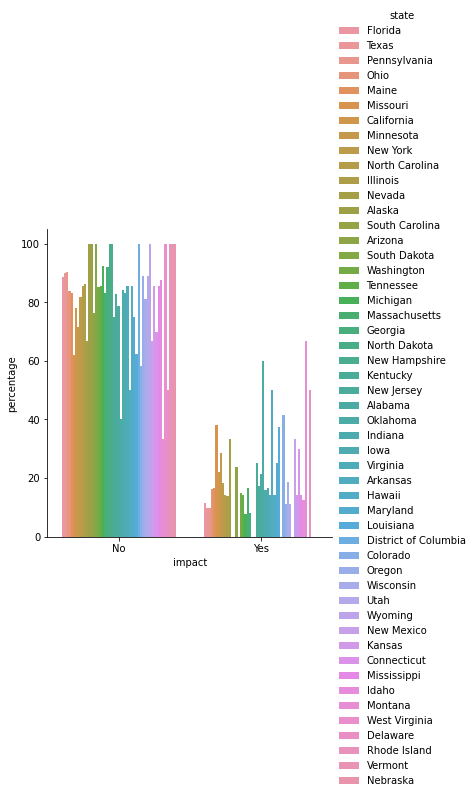

In [180]:
#fig, ax = plt.subplots(figsize = (10,10))
sns.catplot(x = 'impact', y = 'percentage', hue = 'state', data = df_impact, kind = 'bar')
#plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad=0)
plt.show()

In [128]:
#data.state.value_counts()

In [104]:
print(covid19tracker_df.shape)
print(data_counts.shape)

(32930, 410)
(92,)


In [111]:
data_counts.head()

state         w4_2
Florida       No      0.806452
              Yes     0.193548
Texas         No      0.885246
              Yes     0.114754
Pennsylvania  No      0.731707
Name: w4_2, dtype: float64

ValueError: Could not interpret input 'w4_2'

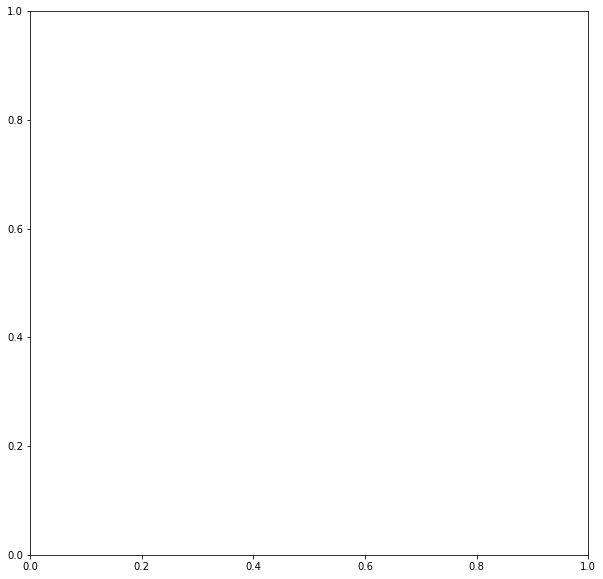

In [107]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = 'w4_2', hue = 'state', data = data_counts)
plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad=0)
plt.show()